In [1]:
# %cd /mnt/59E0-214E/data/Jack/SavageLab/scripts/tecantaloupe
# %cd /Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe
%cd /Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe/

/Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import os

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

In [3]:
file_name= './making_prisim_files/tecan_384w_replicate_platemap.csv'
# plate_map_df = pd.read_csv(file_name)
# display(plate_map_df)
# ps = PlateSpec(plate_map_df)

ps = PlateSpec.FromFile(file_name, plate_size=384)
ps.df

16
16
24
24


value_type name                                      ...                      \
column        1   2   3   4   5   6   7   8   9  10  ...  15  16  17  18  19   
A             1   1   2   2   3   3   4   4   5   5  ...   8   8   9   9  10   
B             0   1   0   2   0   3   0   4   0   5  ...   0   8   0   9   0   
C            13  13  14  14  15  15  16  16  17  17  ...  20  20  21  21  22   
D             0  13   0  14   0  15   0  16   0  17  ...   0  20   0  21   0   
E            25  25  26  26  27  27  28  28  29  29  ...  32  32  33  33  34   
F             0  25   0  26   0  27   0  28   0  29  ...   0  32   0  33   0   
G            37  37  38  38  39  39  40  40  41  41  ...  44  44  45  45  46   
H             0  37   0  38   0  39   0  40   0  41  ...   0  44   0  45   0   
I            49  49  50  50  51  51  52  52  53  53  ...  56  56  57  57  58   
J             0  49   0  50   0  51   0  52   0  53  ...   0  56   0  57   0   
K            61  61  62  62  63  63  64  64  65  65  ...  68  68  69  69  70   
L             0  61   0  62   0  63   0  64   0  65  ...   0  68   0  69   0   
M            73  73  74  74  75  75  76  76  77  77  ...  80  80  81  81  82   
N             0  73   0  74   0  75   0  76   0  77  ...   0  80   0  81   0   
O            85  85  86  86  87  87  88  88  89  89  ...  92  92  93  93  94   
P             0  85   0  86   0  87   0  88   0  89  ...   0  92   0  93   0   

value_type                      
column      20  21  22  23  24  
A           10  11  11  12  12  
B           10   0  11   0  12  
C           22  23  23  24  24  
D           22   0  23   0  24  
E           34  35  35  36  36  
F           34   0  35   0  36  
G           46  47  47  48  48  
H           46   0  47   0  48  
I           58  59  59  60  60  
J           58   0  59   0  60  
K           70  71  71  72  72  
L           70   0  71   0  72  
M           82  83  83  84  84  
N           82   0  83   0  84  
O           94  95  95  96  96  
P           94   0  95   0  96  

[16 rows x 24 columns]

In [4]:
ps = PlateSpec.FromFile(file_name, plate_size=96)
ps.df

16
8
24
12


AssertionError: df size does not match plate_size

In [4]:
ps.well_to_name_mapping()

{'A1': 1,
 'A2': 1,
 'A3': 2,
 'A4': 2,
 'A5': 3,
 'A6': 3,
 'A7': 4,
 'A8': 4,
 'A9': 5,
 'A10': 5,
 'A11': 6,
 'A12': 6,
 'B1': 0,
 'B2': 1,
 'B3': 0,
 'B4': 2,
 'B5': 0,
 'B6': 3,
 'B7': 0,
 'B8': 4,
 'B9': 0,
 'B10': 5,
 'B11': 0,
 'B12': 6,
 'C1': 13,
 'C2': 13,
 'C3': 14,
 'C4': 14,
 'C5': 15,
 'C6': 15,
 'C7': 16,
 'C8': 16,
 'C9': 17,
 'C10': 17,
 'C11': 18,
 'C12': 18,
 'D1': 0,
 'D2': 13,
 'D3': 0,
 'D4': 14,
 'D5': 0,
 'D6': 15,
 'D7': 0,
 'D8': 16,
 'D9': 0,
 'D10': 17,
 'D11': 0,
 'D12': 18,
 'E1': 25,
 'E2': 25,
 'E3': 26,
 'E4': 26,
 'E5': 27,
 'E6': 27,
 'E7': 28,
 'E8': 28,
 'E9': 29,
 'E10': 29,
 'E11': 30,
 'E12': 30,
 'F1': 0,
 'F2': 25,
 'F3': 0,
 'F4': 26,
 'F5': 0,
 'F6': 27,
 'F7': 0,
 'F8': 28,
 'F9': 0,
 'F10': 29,
 'F11': 0,
 'F12': 30,
 'G1': 37,
 'G2': 37,
 'G3': 38,
 'G4': 38,
 'G5': 39,
 'G6': 39,
 'G7': 40,
 'G8': 40,
 'G9': 41,
 'G10': 41,
 'G11': 42,
 'G12': 42,
 'H1': 0,
 'H2': 37,
 'H3': 0,
 'H4': 38,
 'H5': 0,
 'H6': 39,
 'H7': 0,
 'H8': 40,
 'H9': 

In [4]:
parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('./making_prisim_files/060420 T7 Cas13a .xlsx')

# blanked = timecourse.blank(n_skip=0, n_av=3)
# You can blank each well against it's own early timepoints
# by not setting blank_wells

# Smooth with default params.
# smoothed = blanked.smooth()
measurements, _ = zip(*timecourse.well_df.columns)
# print(measurements)
measurements = np.unique(measurements)
measurements

array(['FQ FAM'], dtype='<U6')

In [5]:
timecourse.labels()

['FQ FAM']

In [6]:
dfs = timecourse.save_data_by_name(ps, './making_prisim_files/to_prisim')
for key in dfs.keys():
    print(key)
    display(dfs[key])

FQ FAM


Experiment    NaN            0.0                                             \
Cycle_N    temp_C    time_s    B1   B11   B13   B15   B17   B19   B21   B23   
1            26.7     0.000   8.0   4.0   9.0   5.0   3.0   5.0   2.0   6.0   
2            26.7   143.787  10.0   5.0   7.0   4.0   8.0   9.0   7.0   6.0   
3            26.6   287.425   7.0   4.0   8.0   4.0   3.0   7.0  11.0   4.0   
4            26.6   430.989   5.0   6.0   7.0   0.0   5.0   2.0   3.0  10.0   
5            26.6   574.589   9.0   4.0   6.0   4.0   6.0   4.0   9.0   5.0   
6            26.6   718.153   1.0  10.0   9.0   6.0  11.0  11.0   6.0   3.0   
7            26.4   861.664   6.0   5.0  11.0  11.0  11.0  15.0   3.0  11.0   
8            26.5  1005.208   7.0   7.0   9.0   5.0   2.0   4.0  12.0  14.0   
9            26.6  1148.737   6.0   5.0   2.0  11.0   7.0   3.0   9.0   7.0   
10           26.4  1292.363  10.0   8.0   5.0  15.0   6.0   6.0   8.0   7.0   
11           26.5  1435.906   9.0   8.0   9.0  16.0   3.0   9.0  10.0   8.0   
12           26.5  1579.417  11.0  12.0  10.0   6.0   7.0  12.0   8.0  14.0   
13           26.5  1722.957  10.0   9.0   5.0  10.0  10.0   3.0  10.0   6.0   
14           26.6  1866.664  22.0  12.0   9.0  14.0   9.0   8.0   8.0   7.0   
15           26.5  2010.245  13.0  15.0  10.0   7.0  16.0  12.0   9.0   9.0   
16           26.6  2153.817  18.0  12.0   8.0  15.0  11.0  10.0  11.0  12.0   
17           26.6  2297.494  13.0  12.0   8.0   9.0   5.0  13.0  16.0  15.0   
18           26.6  2441.132   9.0   9.0  12.0   6.0   9.0  15.0  17.0  12.0   
19           26.6  2584.838  10.0   8.0   9.0   9.0  19.0  15.0   6.0  14.0   
20           26.5  2728.591   9.0   7.0   9.0  14.0  15.0  11.0  12.0   9.0   
21           26.6  2872.361  13.0   6.0  12.0  14.0  15.0  13.0  12.0   6.0   
22           26.6  3015.929  13.0  11.0  12.0  23.0  14.0  15.0  19.0  12.0   
23           26.6  3159.609  18.0  13.0  12.0  10.0   7.0  17.0  12.0  17.0   
24           26.6  3303.192  16.0  12.0  15.0  19.0  11.0   7.0  11.0  14.0   
25           26.7  3446.826  14.0   9.0  12.0  11.0   8.0  12.0  17.0  17.0   
26           26.6  3590.499  12.0  16.0  10.0  13.0  12.0  10.0  10.0   8.0   
27           26.7  3734.090  15.0  16.0  18.0  14.0  13.0  14.0  13.0  21.0   
28           26.8  3877.569  17.0  14.0  18.0  20.0  11.0  18.0  18.0  23.0   
29           26.7  4021.083  10.0  11.0  16.0  16.0  18.0  18.0  10.0  17.0   
30           26.8  4164.675  17.0  15.0   9.0  14.0  16.0  12.0  15.0  15.0   
31           26.7  4308.235  16.0  13.0  13.0  12.0  12.0  14.0  13.0  19.0   
32           26.9  4451.797  19.0  14.0  13.0  15.0  18.0  10.0  12.0  16.0   
33           27.0  4595.321  18.0  16.0  14.0  19.0  10.0  14.0  18.0  15.0   
34           26.9  4739.011  23.0  11.0  17.0  18.0  15.0  14.0  14.0  12.0   
35           26.9  4882.611  16.0  18.0  12.0  15.0  17.0  17.0  13.0  11.0   
36           26.8  5026.150  13.0  17.0  16.0  16.0  14.0  22.0  15.0   9.0   
37           26.9  5169.731  22.0  19.0  13.0  11.0  14.0  17.0  17.0  14.0   
38           26.9  5313.292  12.0  17.0  14.0  16.0  18.0  18.0  14.0  11.0   
39           26.9  5456.811  19.0  14.0  17.0  18.0  16.0  10.0  16.0  16.0   
40           26.9  5600.368  22.0  16.0  19.0  12.0  13.0  17.0  11.0  16.0   
41           26.9  5743.958  14.0  15.0  17.0  18.0  15.0  15.0  19.0  17.0   
42           26.8  5887.497  14.0  19.0  17.0  23.0  21.0  11.0  21.0  15.0   
43           27.0  6031.059  19.0  11.0  16.0  20.0  12.0  14.0  21.0  19.0   

Experiment  ...     93.0    94.0                   95.0                 96.0  \
Cycle_N     ...      P18     O19     O20     P20    O21    O22    P22    O23   
1           ...    957.0   689.0   538.0   541.0  584.0  499.0  575.0  619.0   
2           ...   1430.0   542.0   524.0   579.0  621.0  491.0  503.0  582.0   
3           ...   2054.0   677.0   577.0   635.0  514.0  499.0  527.0  566.0   
4           ...   2771.0   721.0   608.0   7

In [7]:
dfs

Experiment    NaN            0.0                                             \
Cycle_N    temp_C    time_s    B1   B11   B13   B15   B17   B19   B21   B23   
1            26.7     0.000   8.0   4.0   9.0   5.0   3.0   5.0   2.0   6.0   
2            26.7   143.787  10.0   5.0   7.0   4.0   8.0   9.0   7.0   6.0   
3            26.6   287.425   7.0   4.0   8.0   4.0   3.0   7.0  11.0   4.0   
4            26.6   430.989   5.0   6.0   7.0   0.0   5.0   2.0   3.0  10.0   
5            26.6   574.589   9.0   4.0   6.0   4.0   6.0   4.0   9.0   5.0   
6            26.6   718.153   1.0  10.0   9.0   6.0  11.0  11.0   6.0   3.0   
7            26.4   861.664   6.0   5.0  11.0  11.0  11.0  15.0   3.0  11.0   
8            26.5  1005.208   7.0   7.0   9.0   5.0   2.0   4.0  12.0  14.0   
9            26.6  1148.737   6.0   5.0   2.0  11.0   7.0   3.0   9.0   7.0   
10           26.4  1292.363  10.0   8.0   5.0  15.0   6.0   6.0   8.0   7.0   
11           26.5  1435.906   9.0   8.0   9.0  16.0   3.0   9.0  10.0   8.0   
12           26.5  1579.417  11.0  12.0  10.0   6.0   7.0  12.0   8.0  14.0   
13           26.5  1722.957  10.0   9.0   5.0  10.0  10.0   3.0  10.0   6.0   
14           26.6  1866.664  22.0  12.0   9.0  14.0   9.0   8.0   8.0   7.0   
15           26.5  2010.245  13.0  15.0  10.0   7.0  16.0  12.0   9.0   9.0   
16           26.6  2153.817  18.0  12.0   8.0  15.0  11.0  10.0  11.0  12.0   
17           26.6  2297.494  13.0  12.0   8.0   9.0   5.0  13.0  16.0  15.0   
18           26.6  2441.132   9.0   9.0  12.0   6.0   9.0  15.0  17.0  12.0   
19           26.6  2584.838  10.0   8.0   9.0   9.0  19.0  15.0   6.0  14.0   
20           26.5  2728.591   9.0   7.0   9.0  14.0  15.0  11.0  12.0   9.0   
21           26.6  2872.361  13.0   6.0  12.0  14.0  15.0  13.0  12.0   6.0   
22           26.6  3015.929  13.0  11.0  12.0  23.0  14.0  15.0  19.0  12.0   
23           26.6  3159.609  18.0  13.0  12.0  10.0   7.0  17.0  12.0  17.0   
24           26.6  3303.192  16.0  12.0  15.0  19.0  11.0   7.0  11.0  14.0   
25           26.7  3446.826  14.0   9.0  12.0  11.0   8.0  12.0  17.0  17.0   
26           26.6  3590.499  12.0  16.0  10.0  13.0  12.0  10.0  10.0   8.0   
27           26.7  3734.090  15.0  16.0  18.0  14.0  13.0  14.0  13.0  21.0   
28           26.8  3877.569  17.0  14.0  18.0  20.0  11.0  18.0  18.0  23.0   
29           26.7  4021.083  10.0  11.0  16.0  16.0  18.0  18.0  10.0  17.0   
30           26.8  4164.675  17.0  15.0   9.0  14.0  16.0  12.0  15.0  15.0   
31           26.7  4308.235  16.0  13.0  13.0  12.0  12.0  14.0  13.0  19.0   
32           26.9  4451.797  19.0  14.0  13.0  15.0  18.0  10.0  12.0  16.0   
33           27.0  4595.321  18.0  16.0  14.0  19.0  10.0  14.0  18.0  15.0   
34           26.9  4739.011  23.0  11.0  17.0  18.0  15.0  14.0  14.0  12.0   
35           26.9  4882.611  16.0  18.0  12.0  15.0  17.0  17.0  13.0  11.0   
36           26.8  5026.150  13.0  17.0  16.0  16.0  14.0  22.0  15.0   9.0   
37           26.9  5169.731  22.0  19.0  13.0  11.0  14.0  17.0  17.0  14.0   
38           26.9  5313.292  12.0  17.0  14.0  16.0  18.0  18.0  14.0  11.0   
39           26.9  5456.811  19.0  14.0  17.0  18.0  16.0  10.0  16.0  16.0   
40           26.9  5600.368  22.0  16.0  19.0  12.0  13.0  17.0  11.0  16.0   
41           26.9  5743.958  14.0  15.0  17.0  18.0  15.0  15.0  19.0  17.0   
42           26.8  5887.497  14.0  19.0  17.0  23.0  21.0  11.0  21.0  15.0   
43           27.0  6031.059  19.0  11.0  16.0  20.0  12.0  14.0  21.0  19.0   

Experiment  ...     93.0    94.0                   95.0                 96.0  \
Cycle_N     ...      P18     O19     O20     P20    O21    O22    P22    O23   
1           ...    957.0   689.0   538.0   541.0  584.0  499.0  575.0  619.0   
2           ...   1430.0   542.0   524.0   579.0  621.0  491.0  503.0  582.0   
3           ...   2054.0   677.0   577.0   635.0  514.0  499.0  527.0  566.0   
4           ...   2771.0   721.0   608.0   7

<Figure size 720x720 with 0 Axes>

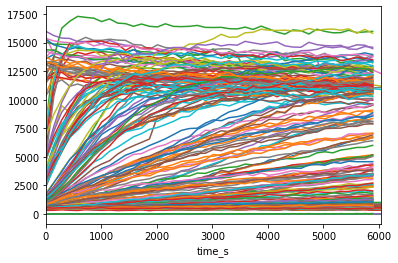

In [12]:
# Smoothed & blanked data.
fig = plt.figure(figsize=(10,10))
OD_data = timecourse.data_for_label(measurements[0])
OD_data.plot(x='time_s', legend=False)
plt.show()

In [13]:
mapping = ps.well_to_name_mapping()

In [14]:
OD_data.columns.map(mapping)

Float64Index([ nan,  1.0,  1.0,  2.0,  2.0,  3.0,  3.0,  4.0,  4.0,  5.0,
              ...
               0.0, 92.0,  0.0, 93.0,  0.0, 94.0,  0.0, 95.0,  0.0, 96.0],
             dtype='float64', name='well', length=385)

In [18]:
ind = pd.MultiIndex.from_arrays([OD_data.columns.map(mapping), OD_data.columns], sortorder=0, 
                                names=['Experiment','well'])
mapped = OD_data.copy()
display(OD_data)
mapped.columns=ind
mapped

well,time_s,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
cycle_n,,,,,,,,,,,,,,,,,,,,,
1,0.000,619.0,552.0,592.0,562.0,490.0,472.0,506.0,522.0,631.0,...,1.0,636.0,4.0,957.0,3.0,541.0,5.0,575.0,-1.0,560.0
2,143.787,608.0,566.0,632.0,537.0,440.0,500.0,563.0,463.0,568.0,...,5.0,679.0,8.0,1430.0,8.0,579.0,5.0,503.0,6.0,515.0
3,287.425,522.0,528.0,631.0,528.0,453.0,428.0,524.0,451.0,546.0,...,6.0,634.0,5.0,2054.0,2.0,635.0,2.0,527.0,7.0,550.0
4,430.989,504.0,508.0,569.0,462.0,450.0,466.0,462.0,457.0,546.0,...,5.0,661.0,4.0,2771.0,4.0,709.0,7.0,563.0,8.0,529.0
5,574.589,557.0,549.0,541.0,459.0,455.0,434.0,487.0,472.0,486.0,...,8.0,661.0,7.0,3502.0,0.0,718.0,5.0,581.0,4.0,543.0
6,718.153,509.0,562.0,582.0,513.0,403.0,442.0,463.0,469.0,525.0,...,18.0,685.0,6.0,4232.0,9.0,822.0,8.0,526.0,5.0,501.0
7,861.664,526.0,558.0,606.0,488.0,425.0,440.0,528.0,456.0,532.0,...,5.0,659.0,8.0,5056.0,4.0,820.0,9.0,573.0,7.0,501.0
8,1005.208,515.0,500.0,527.0,515.0,383.0,452.0,552.0,428.0,547.0,...,6.0,616.0,4.0,5727.0,14.0,990.0,9.0,561.0,11.0,565.0
9,1148.737,482.0,527.0,585.0,475.0,478.0,439.0,483.0,475.0,549.0,...,6.0,615.0,10.0,6289.0,6.0,1042.0,12.0,549.0,12.0,488.0


Experiment       NaN   1.0           2.0           3.0           4.0          \
well          time_s     A1     A2     A3     A4     A5     A6     A7     A8   
cycle_n                                                                        
1              0.000  619.0  552.0  592.0  562.0  490.0  472.0  506.0  522.0   
2            143.787  608.0  566.0  632.0  537.0  440.0  500.0  563.0  463.0   
3            287.425  522.0  528.0  631.0  528.0  453.0  428.0  524.0  451.0   
4            430.989  504.0  508.0  569.0  462.0  450.0  466.0  462.0  457.0   
5            574.589  557.0  549.0  541.0  459.0  455.0  434.0  487.0  472.0   
6            718.153  509.0  562.0  582.0  513.0  403.0  442.0  463.0  469.0   
7            861.664  526.0  558.0  606.0  488.0  425.0  440.0  528.0  456.0   
8           1005.208  515.0  500.0  527.0  515.0  383.0  452.0  552.0  428.0   
9           1148.737  482.0  527.0  585.0  475.0  478.0  439.0  483.0  475.0   
10          1292.363  523.0  509.0  582.0  479.0  435.0  426.0  462.0  422.0   
11          1435.906  522.0  516.0  579.0  507.0  427.0  422.0  467.0  436.0   
12          1579.417  530.0  490.0  545.0  510.0  408.0  442.0  461.0  465.0   
13          1722.957  529.0  513.0  599.0  459.0  440.0  408.0  439.0  468.0   
14          1866.664  509.0  522.0  562.0  458.0  372.0  419.0  472.0  405.0   
15          2010.245  544.0  503.0  647.0  530.0  395.0  405.0  465.0  423.0   
16          2153.817  472.0  542.0  556.0  489.0  425.0  420.0  411.0  438.0   
17          2297.494  541.0  503.0  541.0  464.0  375.0  409.0  392.0  428.0   
18          2441.132  491.0  513.0  565.0  475.0  431.0  415.0  414.0  470.0   
19          2584.838  493.0  526.0  608.0  491.0  400.0  368.0  479.0  421.0   
20          2728.591  516.0  503.0  572.0  521.0  406.0  437.0  442.0  369.0   
21          2872.361  480.0  475.0  561.0  483.0  398.0  364.0  412.0  416.0   
22          3015.929  502.0  588.0  544.0  523.0  390.0  402.0  403.0  435.0   
23          3159.609  526.0  523.0  557.0  520.0  380.0  418.0  421.0  425.0   
24          3303.192  507.0  549.0  557.0  470.0  381.0  418.0  402.0  438.0   
25          3446.826  488.0  498.0  618.0  464.0  403.0  403.0  403.0  426.0   
26          3590.499  468.0  466.0  579.0  491.0  409.0  391.0  400.0  452.0   
27          3734.090  486.0  521.0  563.0  451.0  428.0  405.0  409.0  400.0   
28          3877.569  506.0  474.0  542.0  470.0  379.0  414.0  389.0  447.0   
29          4021.083  451.0  483.0  616.0  473.0  416.0  388.0  392.0  396.0   
30          4164.675  454.0  526.0  536.0  501.0  398.0  368.0  371.0  419.0   
31          4308.235  502.0  516.0  551.0  504.0  414.0  411.0  422.0  450.0   
32          4451.797  508.0  519.0  544.0  463.0  414.0  384.0  388.0  430.0   
33          4595.321  490.0  494.0  581.0  514.0  410.0  423.0  454.0  415.0   
34          4739.011  529.0  529.0  550.0  473.0  385.0  416.0  400.0  395.0   
35          4882.611  459.0  503.0  542.0  462.0  355.0  420.0  388.0  400.0   
36          5026.150  514.0  492.0  577.0  487.0  397.0  406.0  360.0  413.0   
37          5169.731  479.0  524.0  576.0  462.0  401.0  441.0  405.0  435.0   
38          5313.292  528.0  441.0  554.0  427.0  357.0  399.0  359.0  427.0   
39          5456.811  433.0  465.0  579.0  473.0  395.0  385.0  380.0  412.0   
40          5600.368  448.0  498.0  550.0  475.0  387.0  380.0  411.0  435.0   
41          5743.958  450.0  526.0  550.0  468.0  395.0  409.0  378.0  411.0   
42          5887.497  501.0  509.0  552.0  477.0  363.0  416.0  408.0  430.0   
43          6031.059  487.0  481.0  538.0  465.0  375.0  410.0  373.0  385.0   

Experiment   5.0   ...  0.0    92.0  0.0      93.0  0.0     94.0  0.0    95.0  \
well           A9  ...   P15    P16   P17      P18   P19     P20   P21    P22   
cycle_n            ...                                                          
1           631.0  ...   1.0  636.0   4.0    957.0   3.0   541.0   5.0  575.

In [19]:
sort = mapped.sort_index(na_position='first',axis=1)
display(sort)
sort.to_csv('./making_prisim_files/to_prisim.csv')

Experiment       NaN  0.0                                                   \
well          time_s    B1   B11   B13   B15   B17   B19   B21   B23    B3   
cycle_n                                                                      
1              0.000   8.0   4.0   9.0   5.0   3.0   5.0   2.0   6.0   4.0   
2            143.787  10.0   5.0   7.0   4.0   8.0   9.0   7.0   6.0   8.0   
3            287.425   7.0   4.0   8.0   4.0   3.0   7.0  11.0   4.0   3.0   
4            430.989   5.0   6.0   7.0   0.0   5.0   2.0   3.0  10.0   6.0   
5            574.589   9.0   4.0   6.0   4.0   6.0   4.0   9.0   5.0   7.0   
6            718.153   1.0  10.0   9.0   6.0  11.0  11.0   6.0   3.0   4.0   
7            861.664   6.0   5.0  11.0  11.0  11.0  15.0   3.0  11.0  12.0   
8           1005.208   7.0   7.0   9.0   5.0   2.0   4.0  12.0  14.0   6.0   
9           1148.737   6.0   5.0   2.0  11.0   7.0   3.0   9.0   7.0   7.0   
10          1292.363  10.0   8.0   5.0  15.0   6.0   6.0   8.0   7.0   9.0   
11          1435.906   9.0   8.0   9.0  16.0   3.0   9.0  10.0   8.0   8.0   
12          1579.417  11.0  12.0  10.0   6.0   7.0  12.0   8.0  14.0  14.0   
13          1722.957  10.0   9.0   5.0  10.0  10.0   3.0  10.0   6.0   9.0   
14          1866.664  22.0  12.0   9.0  14.0   9.0   8.0   8.0   7.0  11.0   
15          2010.245  13.0  15.0  10.0   7.0  16.0  12.0   9.0   9.0  10.0   
16          2153.817  18.0  12.0   8.0  15.0  11.0  10.0  11.0  12.0   8.0   
17          2297.494  13.0  12.0   8.0   9.0   5.0  13.0  16.0  15.0  15.0   
18          2441.132   9.0   9.0  12.0   6.0   9.0  15.0  17.0  12.0  16.0   
19          2584.838  10.0   8.0   9.0   9.0  19.0  15.0   6.0  14.0  16.0   
20          2728.591   9.0   7.0   9.0  14.0  15.0  11.0  12.0   9.0   8.0   
21          2872.361  13.0   6.0  12.0  14.0  15.0  13.0  12.0   6.0  12.0   
22          3015.929  13.0  11.0  12.0  23.0  14.0  15.0  19.0  12.0  10.0   
23          3159.609  18.0  13.0  12.0  10.0   7.0  17.0  12.0  17.0  18.0   
24          3303.192  16.0  12.0  15.0  19.0  11.0   7.0  11.0  14.0   8.0   
25          3446.826  14.0   9.0  12.0  11.0   8.0  12.0  17.0  17.0  19.0   
26          3590.499  12.0  16.0  10.0  13.0  12.0  10.0  10.0   8.0  13.0   
27          3734.090  15.0  16.0  18.0  14.0  13.0  14.0  13.0  21.0   9.0   
28          3877.569  17.0  14.0  18.0  20.0  11.0  18.0  18.0  23.0  12.0   
29          4021.083  10.0  11.0  16.0  16.0  18.0  18.0  10.0  17.0  12.0   
30          4164.675  17.0  15.0   9.0  14.0  16.0  12.0  15.0  15.0  26.0   
31          4308.235  16.0  13.0  13.0  12.0  12.0  14.0  13.0  19.0  16.0   
32          4451.797  19.0  14.0  13.0  15.0  18.0  10.0  12.0  16.0   9.0   
33          4595.321  18.0  16.0  14.0  19.0  10.0  14.0  18.0  15.0  15.0   
34          4739.011  23.0  11.0  17.0  18.0  15.0  14.0  14.0  12.0  15.0   
35          4882.611  16.0  18.0  12.0  15.0  17.0  17.0  13.0  11.0  12.0   
36          5026.150  13.0  17.0  16.0  16.0  14.0  22.0  15.0   9.0  21.0   
37          5169.731  22.0  19.0  13.0  11.0  14.0  17.0  17.0  14.0  18.0   
38          5313.292  12.0  17.0  14.0  16.0  18.0  18.0  14.0  11.0  17.0   
39          5456.811  19.0  14.0  17.0  18.0  16.0  10.0  16.0  16.0  15.0   
40          5600.368  22.0  16.0  19.0  12.0  13.0  17.0  11.0  16.0  19.0   
41          5743.958  14.0  15.0  17.0  18.0  15.0  15.0  19.0  17.0  14.0   
42          5887.497  14.0  19.0  17.0  23.0  21.0  11.0  21.0  15.0  15.0   
43          6031.059  19.0  11.0  16.0  20.0  12.0  14.0  21.0  19.0  19.0   

Experiment  ...     93.0    94.0                   95.0                 96.0  \
well        ...      P18     O19     O20     P20    O21    O22    P22    O23   
cycle_n     ...                                                                
1           ...    957.0   689.0   538.0   541.0  584.0  499.0  575.0  619.0   
2           ...   1430.0   542.0   524.0   579.0  621.0  491.0  503.0  582.0   
3          

In [22]:
sort = mapped.sort_index(na_position='first',axis=1)
sort.index.name = None
display(sort)
sort.to_csv('./making_prisim_files/to_prisim.csv')

Experiment       NaN  0.0                                                   \
well          time_s    B1   B11   B13   B15   B17   B19   B21   B23    B3   
1              0.000   8.0   4.0   9.0   5.0   3.0   5.0   2.0   6.0   4.0   
2            143.787  10.0   5.0   7.0   4.0   8.0   9.0   7.0   6.0   8.0   
3            287.425   7.0   4.0   8.0   4.0   3.0   7.0  11.0   4.0   3.0   
4            430.989   5.0   6.0   7.0   0.0   5.0   2.0   3.0  10.0   6.0   
5            574.589   9.0   4.0   6.0   4.0   6.0   4.0   9.0   5.0   7.0   
6            718.153   1.0  10.0   9.0   6.0  11.0  11.0   6.0   3.0   4.0   
7            861.664   6.0   5.0  11.0  11.0  11.0  15.0   3.0  11.0  12.0   
8           1005.208   7.0   7.0   9.0   5.0   2.0   4.0  12.0  14.0   6.0   
9           1148.737   6.0   5.0   2.0  11.0   7.0   3.0   9.0   7.0   7.0   
10          1292.363  10.0   8.0   5.0  15.0   6.0   6.0   8.0   7.0   9.0   
11          1435.906   9.0   8.0   9.0  16.0   3.0   9.0  10.0   8.0   8.0   
12          1579.417  11.0  12.0  10.0   6.0   7.0  12.0   8.0  14.0  14.0   
13          1722.957  10.0   9.0   5.0  10.0  10.0   3.0  10.0   6.0   9.0   
14          1866.664  22.0  12.0   9.0  14.0   9.0   8.0   8.0   7.0  11.0   
15          2010.245  13.0  15.0  10.0   7.0  16.0  12.0   9.0   9.0  10.0   
16          2153.817  18.0  12.0   8.0  15.0  11.0  10.0  11.0  12.0   8.0   
17          2297.494  13.0  12.0   8.0   9.0   5.0  13.0  16.0  15.0  15.0   
18          2441.132   9.0   9.0  12.0   6.0   9.0  15.0  17.0  12.0  16.0   
19          2584.838  10.0   8.0   9.0   9.0  19.0  15.0   6.0  14.0  16.0   
20          2728.591   9.0   7.0   9.0  14.0  15.0  11.0  12.0   9.0   8.0   
21          2872.361  13.0   6.0  12.0  14.0  15.0  13.0  12.0   6.0  12.0   
22          3015.929  13.0  11.0  12.0  23.0  14.0  15.0  19.0  12.0  10.0   
23          3159.609  18.0  13.0  12.0  10.0   7.0  17.0  12.0  17.0  18.0   
24          3303.192  16.0  12.0  15.0  19.0  11.0   7.0  11.0  14.0   8.0   
25          3446.826  14.0   9.0  12.0  11.0   8.0  12.0  17.0  17.0  19.0   
26          3590.499  12.0  16.0  10.0  13.0  12.0  10.0  10.0   8.0  13.0   
27          3734.090  15.0  16.0  18.0  14.0  13.0  14.0  13.0  21.0   9.0   
28          3877.569  17.0  14.0  18.0  20.0  11.0  18.0  18.0  23.0  12.0   
29          4021.083  10.0  11.0  16.0  16.0  18.0  18.0  10.0  17.0  12.0   
30          4164.675  17.0  15.0   9.0  14.0  16.0  12.0  15.0  15.0  26.0   
31          4308.235  16.0  13.0  13.0  12.0  12.0  14.0  13.0  19.0  16.0   
32          4451.797  19.0  14.0  13.0  15.0  18.0  10.0  12.0  16.0   9.0   
33          4595.321  18.0  16.0  14.0  19.0  10.0  14.0  18.0  15.0  15.0   
34          4739.011  23.0  11.0  17.0  18.0  15.0  14.0  14.0  12.0  15.0   
35          4882.611  16.0  18.0  12.0  15.0  17.0  17.0  13.0  11.0  12.0   
36          5026.150  13.0  17.0  16.0  16.0  14.0  22.0  15.0   9.0  21.0   
37          5169.731  22.0  19.0  13.0  11.0  14.0  17.0  17.0  14.0  18.0   
38          5313.292  12.0  17.0  14.0  16.0  18.0  18.0  14.0  11.0  17.0   
39          5456.811  19.0  14.0  17.0  18.0  16.0  10.0  16.0  16.0  15.0   
40          5600.368  22.0  16.0  19.0  12.0  13.0  17.0  11.0  16.0  19.0   
41          5743.958  14.0  15.0  17.0  18.0  15.0  15.0  19.0  17.0  14.0   
42          5887.497  14.0  19.0  17.0  23.0  21.0  11.0  21.0  15.0  15.0   
43          6031.059  19.0  11.0  16.0  20.0  12.0  14.0  21.0  19.0  19.0   

Experiment  ...     93.0    94.0                   95.0                 96.0  \
well        ...      P18     O19     O20     P20    O21    O22    P22    O23   
1           ...    957.0   689.0   538.0   541.0  584.0  499.0  575.0  619.0   
2           ...   1430.0   542.0   524.0   579.0  621.0  491.0  503.0  582.0   
3           ...   2054.0   677.0   577.0   635.0  514.0  499.0  527.0  566.0   
4           ...   2771.0   721.0   608.0   709.0  507.0  491.0  563.0  558.0   
5        

In [20]:
OD_data.groupby(ps.well_to_name_mapping(), axis=1).summary()

AttributeError: 'DataFrameGroupBy' object has no attribute 'summary'

In [10]:
means = smoothed.mean_by_name(ps)
sems = smoothed.sem_by_name(ps)
stds = smoothed.std_by_name(ps)

mean_OD = means.data_for_label('GFP')
sems_OD = sems.data_for_label('GFP')
stds_OD = stds.data_for_label('GFP')

In [11]:
keys = list(plate_map_deconstructed.keys())
# keys.index('Used Well')
keys

['Used Well',
 'RNP1(nM)',
 'RNP2(nM)',
 'Primary Activator (nM)',
 'Secondary Activator (nM)',
 'Sec Act Names',
 'Sec Act Spacer 2 Names',
 'Sec Act Spacer 3 Names',
 'Sheet9']

In [12]:
split = np.array([c.split(',') for c in mean_OD.columns if 'time_s' not in c])
keys = list(plate_map_deconstructed.keys())
used_pos = keys.index('Used Well')
rnp2_pos = keys.index('Sec Act Names')
RNP2_conc_pos = keys.index('RNP2(nM)')
list1 = np.unique(split[:,rnp2_pos])
list2 = np.unique(split[:,RNP2_conc_pos])
for RNP2 in list1:
    if RNP2 == '(-)':
        continue
    for RNP2_conc in list2:
        print(mean_OD.columns[np.append(np.logical_and(np.logical_and(split[:,used_pos]=='1',
                                                                      split[:,RNP2_conc_pos]==RNP2_conc)
                                                       ,np.logical_or(split[:,rnp2_pos]==RNP2,
                                                                      split[:,rnp2_pos]=='(-)')),False)])

Index(['1,20nM,0.2nM,0.0,0,(-),(-),(-)',
       '1,20nM,0.2nM,0.0,10,NCR035,NCR046,NCR057',
       '1,20nM,0.2nM,0.02,0,(-),(-),(-)',
       '1,20nM,0.2nM,0.02,10,NCR035,NCR046,NCR057'],
      dtype='object', name='label')
Index(['1,20nM,0.8nM,0.0,0,(-),(-),(-)',
       '1,20nM,0.8nM,0.0,10,NCR035,NCR046,NCR057',
       '1,20nM,0.8nM,0.02,0,(-),(-),(-)',
       '1,20nM,0.8nM,0.02,10,NCR035,NCR046,NCR057'],
      dtype='object', name='label')
Index(['1,20nM,12.8nM,0.0,0,(-),(-),(-)',
       '1,20nM,12.8nM,0.0,10,NCR035,NCR046,NCR057',
       '1,20nM,12.8nM,0.02,0,(-),(-),(-)',
       '1,20nM,12.8nM,0.02,10,NCR035,NCR046,NCR057'],
      dtype='object', name='label')
Index(['1,20nM,3.2nM,0.0,0,(-),(-),(-)',
       '1,20nM,3.2nM,0.0,10,NCR035,NCR046,NCR057',
       '1,20nM,3.2nM,0.02,0,(-),(-),(-)',
       '1,20nM,3.2nM,0.02,10,NCR035,NCR046,NCR057'],
      dtype='object', name='label')
Index(['1,20nM,0.2nM,0.0,0,(-),(-),(-)',
       '1,20nM,0.2nM,0.0,10,NCR036,NCR047,NCR058',
       '1,20

In [13]:
seaborn.set_style('white')

split = np.array([c.split(',') for c in mean_OD.columns if 'time_s' not in c])
keys = list(plate_map_deconstructed.keys())
used_pos = keys.index('Used Well')
rnp2_pos = keys.index('Sec Act Names')
RNP2_conc_pos = keys.index('RNP2(nM)')
list1 = np.unique(split[:,rnp2_pos])
list2 = np.unique(split[:,RNP2_conc_pos])
for RNP2 in list1:
    if RNP2 == '(-)':
        continue
    for RNP2_conc in list2:
        to_plot = mean_OD.columns[np.append(np.logical_and(np.logical_and(split[:,used_pos]=='1',
                                                                      split[:,RNP2_conc_pos]==RNP2_conc)
                                                       ,np.logical_or(split[:,rnp2_pos]==RNP2,
                                                                      split[:,rnp2_pos]=='(-)')),False)]
        plt.figure(figsize=(20,10))
        time_h = mean_OD.time_s / (60.0*60.0)

        colors = seaborn.color_palette()
        for i, c in enumerate(to_plot):
            label = c
            color = colors[i % len(colors)]
            plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                             color=color, alpha=0.5)
            plt.plot(time_h, mean_OD[c], label=label, color=color)
            
            
        plt.legend(loc=(1.01,0.4), fontsize=18)
        plt.xticks(np.arange(0, np.max(time_h)+.1, 0.25), fontsize=14)
        plt.yticks(fontsize=14)
        plt.title(str(RNP2)+'_'+str(RNP2_conc), fontsize=24)
        plt.xlabel('Time (Hours)', fontsize=20)
        plt.ylabel('Flourescence', fontsize=20)
        
        
        plt.savefig('./'+experiment_name+'/graphs/'+str(RNP2)+'_'+str(RNP2_conc)+'.png', bbox_inches='tight')
        plt.savefig('./'+experiment_name+'/graphs/'+str(RNP2)+'_'+str(RNP2_conc)+'.svg', bbox_inches='tight')
        plt.close()

In [14]:
seaborn.set_style('white')
conditions = np.array(sorted([c for c in mean_OD.columns if ('time_s' not in c)&(c.split(',')[used_pos]!='0')]))


plt.figure(figsize=(20,10))
xs = np.array(range(len(conditions)))
plt.bar(xs, mean_OD[conditions].tail(1).values.flatten(), yerr = stds_OD[conditions].tail(1).values.flatten())

plt.ylabel('Flourescence at last time point', fontsize=20)
plt.xticks(xs + 0.4, conditions, rotation=90)
plt.title('Flourescence at last time point', fontsize=24)

plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point.svg', bbox_inches='tight')
plt.close()


mapping = ps.name_to_well_mapping()

times = smoothed.TimeToHalfMax(density_label='GFP')
aoc = smoothed.AreaUnderTheCurve(density_label='GFP')

mean_tthm = {}
std_tthm = {}
mean_aoc = {}
std_aoc = {}
for key in mapping.keys():
    wells = mapping[key]
    values = [times[key]for key in wells]
    mean_tthm[key] = np.mean(values)
    std_tthm[key] = np.std(values)
    values = [aoc[key]for key in wells]
    mean_aoc[key] = np.mean(values)
    std_aoc[key] = np.std(values)

    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(conditions)))
ys = [mean_tthm[con] for con in conditions]
ers = [std_tthm[con] for con in conditions]
plt.bar(xs, ys, yerr = ers)

plt.ylabel('Time to half max', fontsize=20)
plt.xticks(xs + 0.4, conditions, rotation=90)
plt.title('Time to half max', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max.svg', bbox_inches='tight')
plt.close()


    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(conditions)))
ys = [mean_aoc[con] for con in conditions]
ers = [std_aoc[con] for con in conditions]
plt.bar(xs, ys, yerr = ers)

plt.ylabel('Area under the curve', fontsize=20)
plt.xticks(xs + 0.4, conditions, rotation=90)
plt.title('Area under the curve', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve.svg', bbox_inches='tight')
plt.close()

In [15]:
seaborn.set_style('white')

primary= keys.index('Primary Activator (nM)')

no_time = [c for c in mean_OD.columns if ('time_s' not in c)]
ncr_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                  (c.split(',')[used_pos]!='0')&(c.split(',')[primary]!='0.0')]))
cage_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                   (c.split(',')[used_pos]!='0')&(c.split(',')[primary]=='0.0')]))
names = np.array(sorted([' '.join(np.array(list(zip(['rnp2:', 'RNP2_conc:', 'Primary_conc:'],
                                      np.array(c.split(','))[[rnp2_pos, RNP2_conc_pos, 
                                                              primary]]))).flatten()) for c in ncr_conditions]))

width= 0.35

plt.figure(figsize=(20,10))
xs = np.array(range(len(ncr_conditions)))
plt.bar(xs - width/2, 
        mean_OD[cage_conditions].tail(1).values.flatten(),
       width, 
        yerr = stds_OD[cage_conditions].tail(1).values.flatten(),
       label='Cage only')
plt.bar(xs + width/2, 
        mean_OD[ncr_conditions].tail(1).values.flatten(),
       width, 
        yerr = stds_OD[ncr_conditions].tail(1).values.flatten(),
       label='NCR')

plt.legend(loc=(1.01,0.4), fontsize=18)
plt.ylabel('Flourescence at last time point', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Flourescence at last time point', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point_grouped.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point_grouped.svg', bbox_inches='tight')
plt.close()


mapping = ps.name_to_well_mapping()

times = smoothed.TimeToHalfMax(density_label='GFP')
aoc = smoothed.AreaUnderTheCurve(density_label='GFP')

mean_tthm = {}
std_tthm = {}
mean_aoc = {}
std_aoc = {}
for key in mapping.keys():
    wells = mapping[key]
    values = [times[key]for key in wells]
    mean_tthm[key] = np.mean(values)
    std_tthm[key] = np.std(values)
    values = [aoc[key]for key in wells]
    mean_aoc[key] = np.mean(values)
    std_aoc[key] = np.std(values)

    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))
ys = [mean_tthm[con] for con in cage_conditions]
ers = [std_tthm[con] for con in cage_conditions]
plt.bar(xs - width/2, ys, width, yerr = ers, label='Cage only')

ys = [mean_tthm[con] for con in ncr_conditions]
ers = [std_tthm[con] for con in ncr_conditions]
plt.bar(xs + width/2, ys, width, yerr = ers, label='NCR')

plt.legend(loc=(1.01,0.4), fontsize=18)
plt.ylabel('Time to half max', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Time to half max', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max_grouped.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max_grouped.svg', bbox_inches='tight')
plt.close()


    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))
ys = [mean_aoc[con] for con in cage_conditions]
ers = [std_aoc[con] for con in cage_conditions]
plt.bar(xs - width/2, ys, width, yerr = ers, label='Cage only')

ys = [mean_aoc[con] for con in ncr_conditions]
ers = [std_aoc[con] for con in ncr_conditions]
plt.bar(xs + width/2, ys, width, yerr = ers, label='NCR')

plt.legend(loc=(1.01,0.4), fontsize=18)
plt.ylabel('Area under the curve', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Area under the curve', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped.svg', bbox_inches='tight')
plt.close()

In [16]:
seaborn.set_style('white')

primary= keys.index('Primary Activator (nM)')

no_time = [c for c in mean_OD.columns if ('time_s' not in c)]
ncr_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                  (c.split(',')[used_pos]!='0')&(c.split(',')[primary]!='0.0')]))
cage_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                   (c.split(',')[used_pos]!='0')&(c.split(',')[primary]=='0.0')]))
names = np.array(sorted([' '.join(np.array(list(zip(['rnp2:', 'RNP2_conc:', 'Primary_conc:'],
                                      np.array(c.split(','))[[rnp2_pos, RNP2_conc_pos, 
                                                              primary]]))).flatten()) for c in ncr_conditions]))

plt.figure(figsize=(20,10))
xs = np.array(range(len(ncr_conditions)))

cage_y = mean_OD[cage_conditions].tail(1).values.flatten()
ncr_y = mean_OD[ncr_conditions].tail(1).values.flatten()
cage_err = stds_OD[cage_conditions].tail(1).values.flatten()
ncr_err = stds_OD[ncr_conditions].tail(1).values.flatten()

prop_err = np.sqrt(np.add(np.power(ncr_y/ncr_err, 2), np.power(cage_y/cage_err, 2)))

plt.bar(xs, 
        ncr_y/cage_y,
        yerr = prop_err)

plt.ylabel('Flourescence at last time point ratio', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Flourescence at last time point ratio', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point_ratio.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point_ratio.svg', bbox_inches='tight')
plt.close()


mapping = ps.name_to_well_mapping()

times = smoothed.TimeToHalfMax(density_label='GFP')
aoc = smoothed.AreaUnderTheCurve(density_label='GFP')

mean_tthm = {}
std_tthm = {}
mean_aoc = {}
std_aoc = {}
for key in mapping.keys():
    wells = mapping[key]
    values = [times[key]for key in wells]
    mean_tthm[key] = np.mean(values)
    std_tthm[key] = np.std(values)
    values = [aoc[key]for key in wells]
    mean_aoc[key] = np.mean(values)
    std_aoc[key] = np.std(values)

    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))


cage_ys = np.array([mean_tthm[con] for con in cage_conditions])
cage_ers = np.array([std_tthm[con] for con in cage_conditions])

ncr_ys = np.array([mean_tthm[con] for con in ncr_conditions])
ncr_ers = np.array([std_tthm[con] for con in ncr_conditions])

prop_err = np.sqrt(np.add(np.power(ncr_y/ncr_err, 2), np.power(cage_y/cage_err, 2)))


plt.bar(xs, ncr_ys/cage_ys, yerr = prop_err)

plt.ylabel('Time to half max ratio', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Time to half max ratio', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max_grouped_ratio.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max_grouped_ratio.svg', bbox_inches='tight')
plt.close()

    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))

cage_ys = np.array([mean_aoc[con] for con in cage_conditions])
cage_ers = np.array([std_aoc[con] for con in cage_conditions])
ncr_ys = np.array([mean_aoc[con] for con in ncr_conditions])
ncr_ers = np.array([std_aoc[con] for con in ncr_conditions])

prop_err = np.sqrt(np.add(np.power(ncr_y/ncr_err, 2), np.power(cage_y/cage_err, 2)))
plt.bar(xs, ncr_ys/cage_ys, yerr = prop_err)

plt.ylabel('Area under the curve ratio', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Area under the curve ratio', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped_ratio.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped_ratio.svg', bbox_inches='tight')
plt.close()

In [17]:
seaborn.set_style('white')

primary= keys.index('Primary Activator (nM)')

no_time = [c for c in mean_OD.columns if ('time_s' not in c)]
ncr_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                  (c.split(',')[used_pos]!='0')&(c.split(',')[primary]!='0.0')]))
cage_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                   (c.split(',')[used_pos]!='0')&(c.split(',')[primary]=='0.0')]))
names = np.array(sorted([' '.join(np.array(list(zip(['rnp2:', 'RNP2_conc:', 'Primary_conc:'],
                                      np.array(c.split(','))[[rnp2_pos, RNP2_conc_pos, 
                                                              primary]]))).flatten()) for c in ncr_conditions]))

plt.figure(figsize=(20,10))
xs = np.array(range(len(ncr_conditions)))

cage_y = mean_OD[cage_conditions].tail(1).values.flatten()
ncr_y = mean_OD[ncr_conditions].tail(1).values.flatten()
cage_err = stds_OD[cage_conditions].tail(1).values.flatten()
ncr_err = stds_OD[ncr_conditions].tail(1).values.flatten()

prop_err = np.sqrt(np.add(np.power(ncr_y/ncr_err, 2), np.power(cage_y/cage_err, 2)))

plt.bar(xs, 
        ncr_y-cage_y,
        yerr = prop_err)

plt.ylabel('Flourescence at last time point difference', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Flourescence at last time point difference', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point_dif.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Flourescence_at_last_time_point_dif.svg', bbox_inches='tight')
plt.close()


mapping = ps.name_to_well_mapping()

times = smoothed.TimeToHalfMax(density_label='GFP')
aoc = smoothed.AreaUnderTheCurve(density_label='GFP')

mean_tthm = {}
std_tthm = {}
mean_aoc = {}
std_aoc = {}
for key in mapping.keys():
    wells = mapping[key]
    values = [times[key]for key in wells]
    mean_tthm[key] = np.mean(values)
    std_tthm[key] = np.std(values)
    values = [aoc[key]for key in wells]
    mean_aoc[key] = np.mean(values)
    std_aoc[key] = np.std(values)

    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))


cage_ys = np.array([mean_tthm[con] for con in cage_conditions])
cage_ers = np.array([std_tthm[con] for con in cage_conditions])

ncr_ys = np.array([mean_tthm[con] for con in ncr_conditions])
ncr_ers = np.array([std_tthm[con] for con in ncr_conditions])

prop_err = np.sqrt(np.add(np.power(ncr_y/ncr_err, 2), np.power(cage_y/cage_err, 2)))


plt.bar(xs, ncr_ys-cage_ys, yerr = prop_err)

plt.ylabel('Time to half max difference', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Time to half max difference', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max_grouped_dif.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Time_to_half_max_grouped_dif.svg', bbox_inches='tight')
plt.close()

    
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))

cage_ys = np.array([mean_aoc[con] for con in cage_conditions])
cage_ers = np.array([std_aoc[con] for con in cage_conditions])
ncr_ys = np.array([mean_aoc[con] for con in ncr_conditions])
ncr_ers = np.array([std_aoc[con] for con in ncr_conditions])

prop_err = np.sqrt(np.add(np.power(ncr_y/ncr_err, 2), np.power(cage_y/cage_err, 2)))
plt.bar(xs, ncr_ys-cage_ys, yerr = prop_err)

plt.ylabel('Area under the curve difference', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Area under the curve difference', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped_dif.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped_dif.svg', bbox_inches='tight')
plt.close()

In [34]:
primary= keys.index('Primary Activator (nM)')
print(primary)
secondary= int(keys.index('Secondary Activator (nM)'))
print(secondary)

prime = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                  (c.split(',')[used_pos]!='0')&
                                      (c.split(',')[primary]!='0.0')&
                                     (c.split(',')[secondary]=='0')]))

ncr_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                  (c.split(',')[used_pos]!='0')&
                                  (c.split(',')[primary]!='0.0')&
                                     (c.split(',')[secondary]!='0')]))

cage_conditions = np.array(sorted([c for c in no_time if ('time_s' not in c)&
                                   (c.split(',')[used_pos]!='0')&
                                   (c.split(',')[primary]=='0.0')&
                                     (c.split(',')[secondary]!='0')]))



primary_conditions = []
for ncr_option in ncr_conditions:
    situation = np.array(ncr_option.split(','))[[rnp2_pos, RNP2_conc_pos, primary]]
#     print(situation)
#     print([c for c in prime if (c.split(',')[RNP2_conc_pos]==situation[1])&
#                             (c.split(',')[primary]==situation[2])])
    primary_conditions.append([c for c in prime if (c.split(',')[RNP2_conc_pos]==situation[1])&
                            (c.split(',')[primary]==situation[2])][0])

names = np.array(sorted([' '.join(np.array(list(zip(['rnp2:', 'RNP2_conc:', 'Primary_conc:'],
                                      np.array(c.split(','))[[rnp2_pos, RNP2_conc_pos, 
                                                              primary]]))).flatten()) for c in ncr_conditions]))
print(len(primary_conditions))
print(len(ncr_conditions))
print(len(cage_conditions))
print(len(names))

# print(primary_conditions)
# print(ncr_conditions)
# print(cage_conditions)
# print(names)

3
4
44
44
44
44


In [36]:
seaborn.set_style('white')
plt.figure(figsize=(20,10))
xs = np.array(range(len(cage_conditions)))

cage_ys = np.array([mean_aoc[con] for con in cage_conditions])
cage_ers = np.array([std_aoc[con] for con in cage_conditions])
ncr_ys = np.array([mean_aoc[con] for con in ncr_conditions])
ncr_ers = np.array([std_aoc[con] for con in ncr_conditions])
primary_ys = np.array([mean_aoc[con] for con in primary_conditions])
primary_ers = np.array([std_aoc[con] for con in primary_conditions])

prop_err = np.sqrt(np.add(np.power(ncr_ers, 2), np.power(cage_ers, 2), np.power(primary_ers, 2)))
plt.bar(xs, ncr_ys-cage_ys-primary_ys, yerr = prop_err)

plt.ylabel('Area under the curve difference', fontsize=20)
plt.xticks(xs + 0.4, names, rotation=90)
plt.title('Area under the curve difference', fontsize=24)
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped_dif.png', bbox_inches='tight')
plt.savefig('./'+experiment_name+'/metrics/Area_under_the_curve_grouped_dif.svg', bbox_inches='tight')
plt.close()